In [1]:
from src.cnc import CNC, simulate_from_distribution
from src.utils import * #, qutip_simuation
from src.vertex_decomposition import find_vertex_decomposition, find_cnc_vertex_decomposition
import matplotlib.pyplot as plt
from src.sim_examples import *

In [2]:
# Load data:
from src.utils import load_all_maximal_cncs_matrix
all_cncs_2 = load_all_maximal_cncs_matrix(2)
all_cncs_3 = load_all_maximal_cncs_matrix(3)

# Example 1: Computing a Boolean function

## Quantum circuit via Qiskit:

Quantum circuit for inputs (0,0)
     ┌───┐   ┌─────┐ ┌───┐ ┌─┐           
q_0: ┤ H ├─■─┤ Sdg ├─┤ H ├─┤M├───────────
     ├───┤ │ └─────┘ ├───┤ └╥┘┌─┐        
q_1: ┤ H ├─■────■────┤ H ├──╫─┤M├────────
     ├───┤      │   ┌┴───┴┐ ║ └╥┘┌───┐┌─┐
q_2: ┤ H ├──────■───┤ Sdg ├─╫──╫─┤ H ├┤M├
     └───┘          └─────┘ ║  ║ └───┘└╥┘
c: 3/═══════════════════════╩══╩═══════╩═
                            0  1       2  

Quantum circuit for inputs (0,1)
     ┌───┐   ┌─────┐ ┌───┐ ┌─┐        
q_0: ┤ H ├─■─┤ Sdg ├─┤ H ├─┤M├────────
     ├───┤ │ └─────┘┌┴───┴┐└╥┘┌───┐┌─┐
q_1: ┤ H ├─■────■───┤ Sdg ├─╫─┤ H ├┤M├
     ├───┤      │   └─┬─┬─┘ ║ └───┘└╥┘
q_2: ┤ H ├──────■─────┤M├───╫───────╫─
     └───┘            └╥┘   ║       ║ 
c: 3/══════════════════╩════╩═══════╩═
                       2    0       1  

Quantum circuit for inputs (1,0)
     ┌───┐      ┌─┐        
q_0: ┤ H ├─■────┤M├────────
     ├───┤ │    └╥┘┌───┐┌─┐
q_1: ┤ H ├─■──■──╫─┤ H ├┤M├
     ├───┤    │  ║ └┬─┬┘└╥┘
q_2: ┤ H ├────■──╫──┤M├──╫─


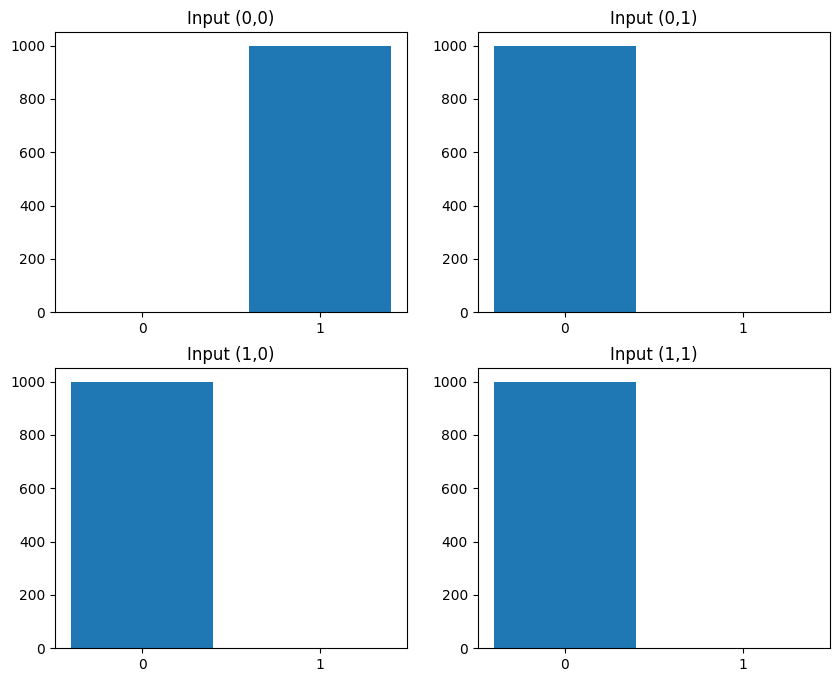

In [3]:
qc_boolean = qc_boolean_function()

## CNC-based Magic Simulation

In our case here the input state is a stabilizer state, which is a special kind of CNC operator. This makes the initial distribution of CNC operators quite simple, i.e. there is a unique operator that we sample from. In our case this initial state is (up to local Clifford gates) equivalent to the well-known Greenberger-Horne-Zeilinger (GHZ) state. 

In [2]:
GHZ_CNC = CNC({
    Pauli("III"): 0,
    Pauli("XZI"): 0,
    Pauli("IZX"): 0,
    Pauli("ZXZ"): 0,
    Pauli("YYZ"): 0,
    Pauli("ZYY"): 0,
    Pauli("XIX"): 0,
    Pauli("YXY"): 1
})
GHZ = GHZ_CNC.get_pauli_basis_representation()
initial_distribution = {GHZ_CNC: 1}

In [3]:
measurements = [
    [Pauli("YII"),Pauli("IXI"),Pauli("IIY")],
    [Pauli("YII"),Pauli("IYI"),Pauli("IIZ")],
    [Pauli("ZII"),Pauli("IXI"),Pauli("IIZ")],
    [Pauli("ZII"),Pauli("IYI"),Pauli("IIY")]
]

In [6]:
# Initialize simulation:
shots = 1024
magic_sim_boolean = magic_sim_boolean_function(initial_distribution,measurements,shots)

Initial cnc: dict_keys([Pauli Operator: III, Pauli Operator: XZI, Pauli Operator: IZX, Pauli Operator: ZXZ, Pauli Operator: YYZ, Pauli Operator: ZYY, Pauli Operator: XIX, Pauli Operator: YXY])
Initial cnc: dict_keys([Pauli Operator: III, Pauli Operator: XZI, Pauli Operator: IZX, Pauli Operator: ZXZ, Pauli Operator: YYZ, Pauli Operator: ZYY, Pauli Operator: XIX, Pauli Operator: YXY])
Initial cnc: dict_keys([Pauli Operator: III, Pauli Operator: XZI, Pauli Operator: IZX, Pauli Operator: ZXZ, Pauli Operator: YYZ, Pauli Operator: ZYY, Pauli Operator: XIX, Pauli Operator: YXY])
Initial cnc: dict_keys([Pauli Operator: III, Pauli Operator: XZI, Pauli Operator: IZX, Pauli Operator: ZXZ, Pauli Operator: YYZ, Pauli Operator: ZYY, Pauli Operator: XIX, Pauli Operator: YXY])
Initial cnc: dict_keys([Pauli Operator: III, Pauli Operator: XZI, Pauli Operator: IZX, Pauli Operator: ZXZ, Pauli Operator: YYZ, Pauli Operator: ZYY, Pauli Operator: XIX, Pauli Operator: YXY])
Initial cnc: dict_keys([Pauli Opera

## CNC-based Magic Simulation

In general, stabilizer states can also be written as a probabilistic mixture of just two CNC operators. In this way the CNC-based approach goes beyond stabilizer circuits.

In [26]:
CNC1 = CNC({
    Pauli("III"): 0,
    Pauli("XZI"): 0,
    Pauli("ZXZ"): 0,
    Pauli("YYZ"): 0,
    Pauli("IZX"): 0,
    Pauli("ZYY"): 0,
    Pauli("XIX"): 0,
    Pauli("YXY"): 1,
    Pauli("IIZ"): 0,
    Pauli("XZZ"): 0,
    Pauli("ZXI"): 0,
    Pauli("YYI"): 0,
    Pauli("IZY"): 0,
    Pauli("XIY"): 0,
    Pauli("ZYX"): 1,
    Pauli("YXX"): 0,
})
CNC2 = CNC({
    Pauli("III"): 0,
    Pauli("XZI"): 0,
    Pauli("ZXZ"): 0,
    Pauli("YYZ"): 0,
    Pauli("IZX"): 0,
    Pauli("ZYY"): 0,
    Pauli("XIX"): 0,
    Pauli("YXY"): 1,
    Pauli("IIZ"): 1,
    Pauli("XZZ"): 1,
    Pauli("ZXI"): 1,
    Pauli("YYI"): 1,
    Pauli("IZY"): 1,
    Pauli("XIY"): 1,
    Pauli("ZYX"): 0,
    Pauli("YXX"): 1,
})
initial_distribution = {CNC1: 0.5, CNC2:0.5}

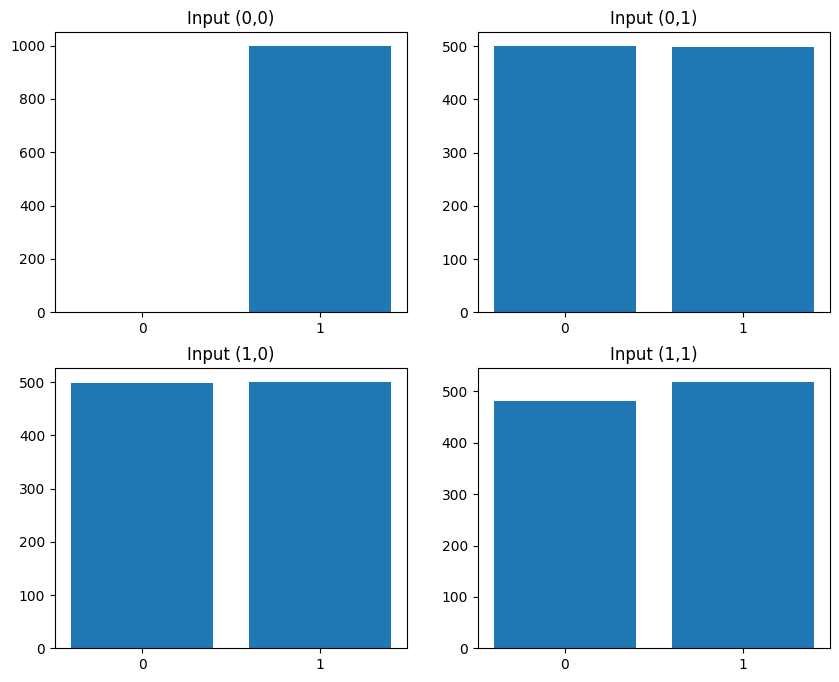

In [27]:
# Initialize simulation:
shots = 1000
magic_sim_boolean = magic_sim_boolean_function(initial_distribution,measurements,shots)

## Initial distribution

For classical simulation of quantum circuits using CNC-based Magic Simulation it suffices to know the decomposition of $\Pi_T^{\otimes n}$ in terms of CNC operators, where $\Pi_T = \left | T \right \rangle \left \langle T \right | = (I+(X+Z)/\sqrt{2})/2$ and $n$ is the number of qubits. In general this will be a quasi-distribution and the computational cost will be related to the amount of "negativity" in the initial distribution. Currently we are devising techniques for decomposing this special state. 

However, it may be the case that you wish to initialize the simulation in another state for which a tailor-made algorithm is not available. For this we can use standard optimization packages to determine the initial distribution.

In [5]:
is_convex, initial_distribution = find_cnc_vertex_decomposition(GHZ, all_cncs_3)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/selmanipek/GitHub/PolytopeSimulation/venv/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/m4/pp85n2_d0t35q9wcrh9x24fr0000gn/T/1766fdb94e9f4e8abdeffb37a5a6a6c8-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/m4/pp85n2_d0t35q9wcrh9x24fr0000gn/T/1766fdb94e9f4e8abdeffb37a5a6a6c8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 70 COLUMNS
At line 827424 RHS
At line 827490 BOUNDS
At line 827492 ENDATA
Problem MODEL has 65 rows, 72217 columns and 827352 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 64 (-1) rows, 72216 (-1) columns and 755136 (-72216) elements
0  Obj 0 Primal inf 7.999992 (8) Dual inf 72215.961 (39001)
7  Obj 0
Optimal - objective value 0
After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 0 - 7 iterat

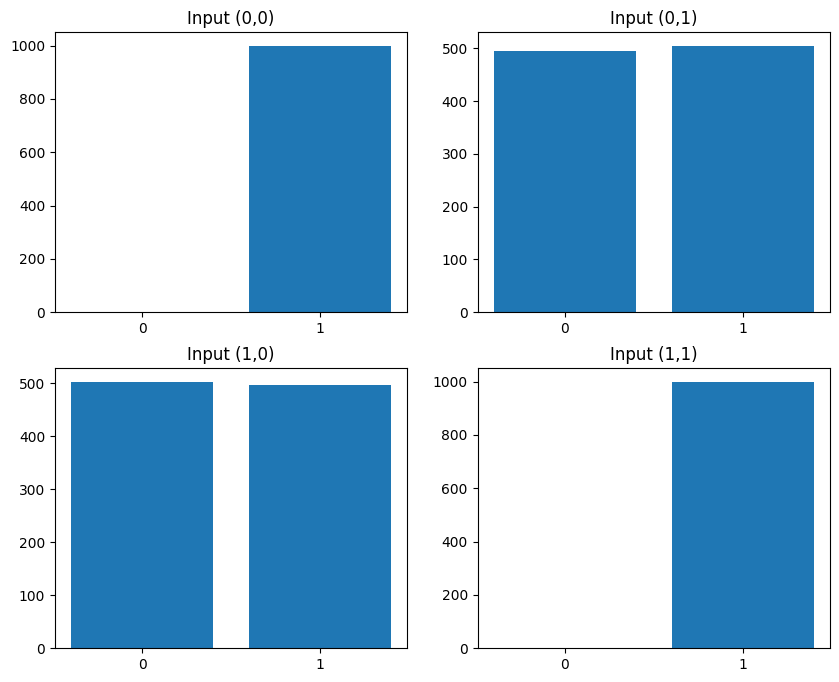

In [10]:
# Initialize simulation:
shots = 1000
magic_sim_boolean = magic_sim_boolean_function(initial_distribution,measurements,shots)

# Example 2:

## Quantum Circuit:

     ┌───┐┌────────┐┌───┐┌─┐
  q: ┤ H ├┤ P(π/4) ├┤ H ├┤M├
     └───┘└────────┘└───┘└╥┘
c: 1/═════════════════════╩═
                          0 


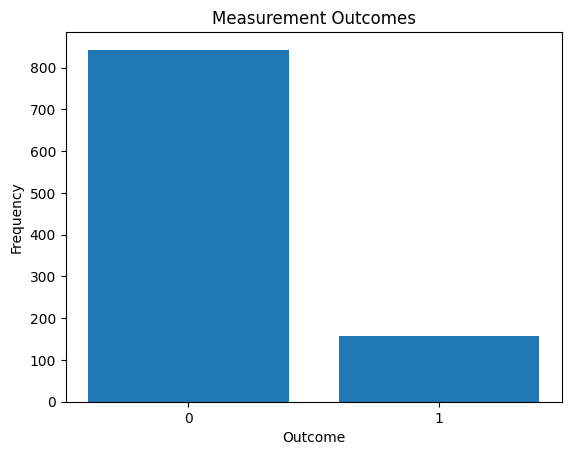

In [24]:
qc_HTH()

## Magic state injection

     ┌───┐                   ┌────────┐┌───┐┌─┐
q_0: ┤ H ├────────────■──────┤ P(π/2) ├┤ H ├┤M├
     ├───┤┌────────┐┌─┴─┐┌─┐ └───╥────┘└───┘└╥┘
q_1: ┤ H ├┤ P(π/4) ├┤ X ├┤M├─────╫───────────╫─
     └───┘└────────┘└───┘└╥┘┌────╨────┐      ║ 
c: 1/═════════════════════╩═╡ c_0=0x1 ╞══════╩═
                          0 └─────────┘      0 


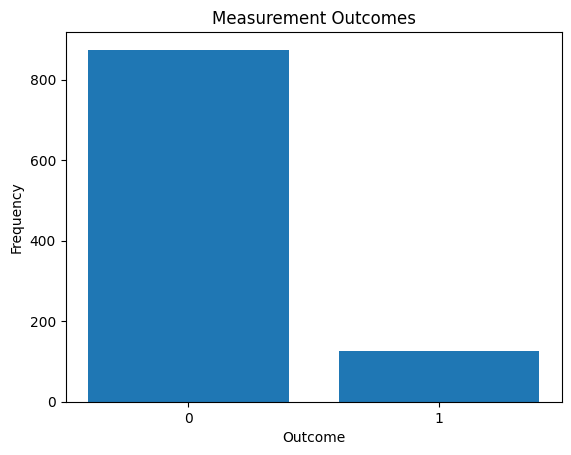

In [25]:
qc = qc_magic_HTH()

## Pauli-based computation

Following Bravyi, Smith, and Smolin, this circuit can in turn be simulated using a Pauli-based computation (PBC). In particular, the PBC scheme reduces the MSI circuit above with two qubits to a measurement-based computation on a single $T$-state $\left | T \right \rangle = (|0\rangle +e^{i\pi/4}|1\rangle)/\sqrt{2}$. To simulate the circuit above we first generate a random classical bit $s$ such that if $s=0$ measure $X$, otherwise measure $Y$. The quantum circuit accomplishing this is shown below.

     ┌───┐┌────────┐┌─────┐┌───┐┌─┐
  q: ┤ H ├┤ P(π/4) ├┤ Sdg ├┤ H ├┤M├
     └───┘└────────┘└─────┘└───┘└╥┘
c: 1/════════════════════════════╩═
                                 0 


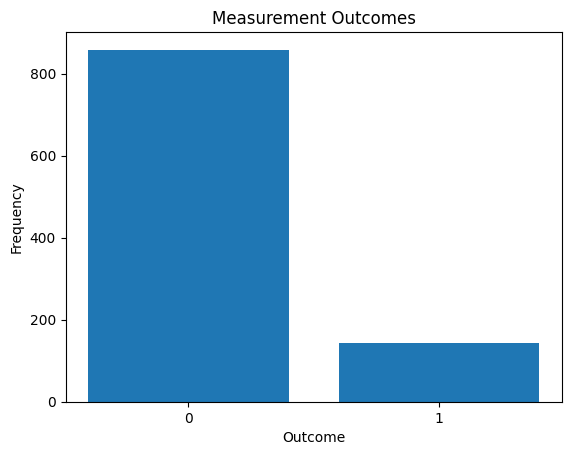

In [26]:
qc_pbc = qc_HTH_PBC()

## CNC-based Magic Simulation

Using the same measurement sequence as above we can also simulate this circuit using our sampling-based Magic Simulation.

In [31]:
# Define T state:
r = 1/np.sqrt(2)
T = np.array([1,r,0,r])

In [32]:
# Single qubit cnc operators
A000 = np.array([1,1,1,1])
A010 = np.array([1,1,-1,1])
A101 = np.array([1,-1,1,-1])

In [28]:
CNC1 = CNC({
    Pauli("I"): 0,
    Pauli("X"): 0,
    Pauli("Y"): 0,
    Pauli("Z"): 0
})
CNC2 = CNC({
    Pauli("I"): 0,
    Pauli("X"): 0,
    Pauli("Y"): 1,
    Pauli("Z"): 0
})
CNC3 = CNC({
    Pauli("I"): 0,
    Pauli("X"): 1,
    Pauli("Y"): 0,
    Pauli("Z"): 1
})

In [33]:
# Decomposition of T-state:
T_prime = (1/2)*(r*A000+A010+(1-r)*A101)
# Check that this works:
set(T) == set(T_prime)

True

In [34]:
# Initialize simulation:
initial_distribution = {(CNC1): r/2, CNC2: 0.5, CNC3: (1-r)/2}
measurements = [[Pauli('X')],[Pauli('Y')]]
shots = 1000
outcome_counts = [simulate_from_distribution(initial_distribution, measurements[m], shots) for m in range(len(measurements))]
#outcome_counts = magic_sim_HTH(initial_distribution,measurements,shots)

In [35]:
outcome_counts

[{'0': 858, '1': 142}, {'1': 1000}]

# Example 3:

# Extra

In [ ]:
# For Magic State injection we require the following state:
#ZeroT = np.kron(Zero,T)
#measurements = [[Pauli('IX'),Pauli('ZX')],[Pauli('XZ'),Pauli('IX')]]
#; Zero = np.array([1,0,0,1])
#QuantumState = np.kron(Zero,T)

# Our input state can be decomposed using the following CNC operators:
ZeroA000 = np.kron(Zero,A000)
ZeroA010 = np.kron(Zero,A010)
ZeroA101 = np.kron(Zero,A101)
# We can check that this decomposition works:
ZeroT_prime = (1/2)*(r*ZeroA000+ZeroA010+(1-r)*ZeroA101)
set(ZeroT) == set(ZeroT_prime)

#counts_cnc = simulate_from_distribution(
#    initial_distribution, [Pauli('IX')], shots
#)
#counts_cnc = simulate_from_distribution(
#    initial_distribution, [Pauli('IX')], shots
#)

# CNC operators in support:
CNC1 = CNC.from_pauli_basis_representation(ZeroA000)
CNC2 = CNC.from_pauli_basis_representation(ZeroA010)
CNC3 = CNC.from_pauli_basis_representation(ZeroA101)